In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
harman_df = pd.read_csv("haberman.csv")

In [3]:
harman_df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
harman_df.shape

(306, 4)

In [5]:
harman_df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [6]:
harman_df.status.value_counts()

1    225
2     81
Name: status, dtype: int64

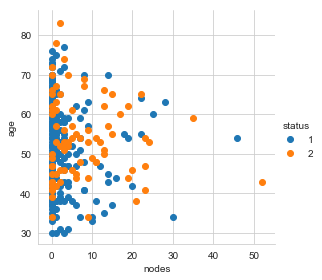

In [19]:
sns.set_style("whitegrid");
sns.FacetGrid(harman_df, hue = "status", size = 4).map(plt.scatter, "nodes", "age").add_legend()

/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


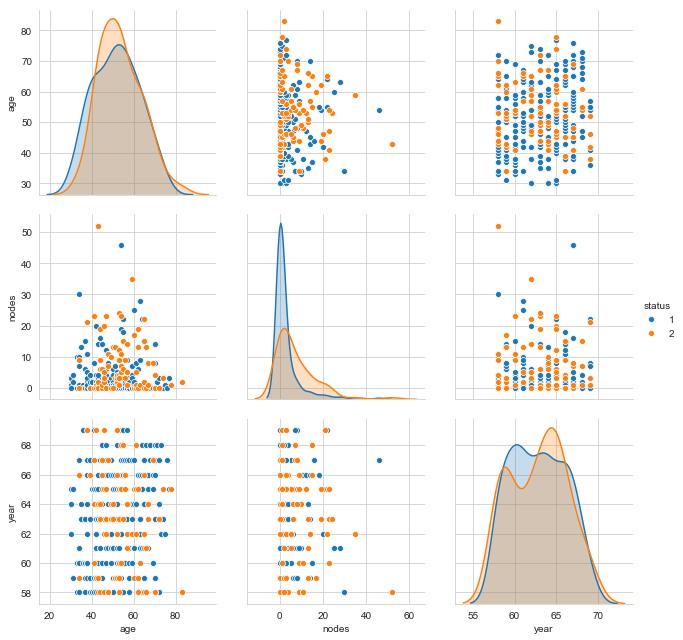

In [22]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(harman_df, hue="status", size = 3, vars=['age','nodes','year'])
plt.show()

Observations:-
1. In plot 3, between age and year, there are some overlap but this is better than the others
2. It is very difficult to find lines and if else conditions based on the plots

# 1D Scatter Plot 

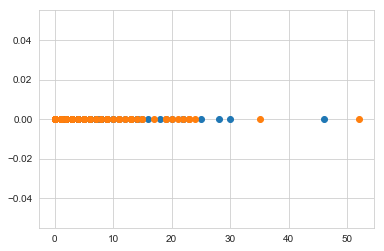

In [28]:
haberman_survive = harman_df.loc[harman_df['status'] == 1]
haberman_not_survive = harman_df.loc[harman_df['status'] == 2]
plt.plot(haberman_survive["nodes"], np.zeros_like(haberman_survive['nodes']), 'o')
plt.plot(haberman_not_survive["nodes"], np.zeros_like(haberman_not_survive['nodes']), 'o')
plt.show()

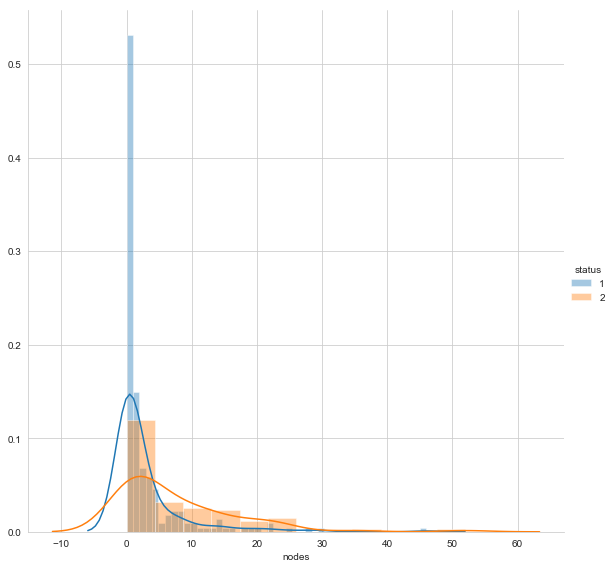

In [33]:
# PDF
sns.FacetGrid(harman_df, hue = "status", size = 8) \
   .map(sns.distplot,"nodes") \
   .add_legend()


Observation:-
1. If the number of nodes are less, the chances of surivival is more
2. If Auxilary <= 0, survive,
3. else if auxilary > 0 and < 4~, chances of surviving is high
4. else will not survive

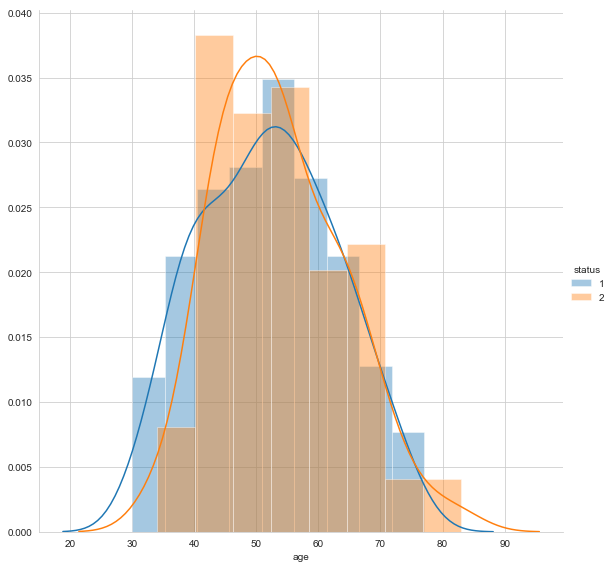

In [34]:
# PDF
sns.FacetGrid(harman_df, hue = "status", size = 8) \
   .map(sns.distplot,"age") \
   .add_legend()


Mostly overlapping, difficult to predict anything

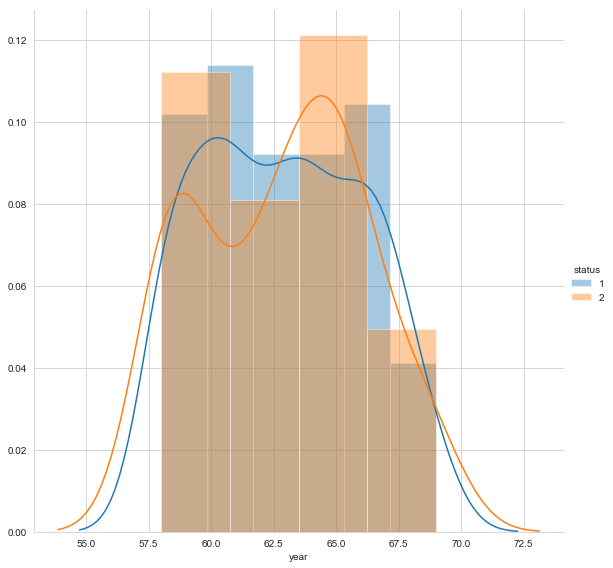

In [35]:
# PDF
sns.FacetGrid(harman_df, hue = "status", size = 8) \
   .map(sns.distplot,"year") \
   .add_legend()


Mostly overlapping, difficult to predict anything

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
[0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]


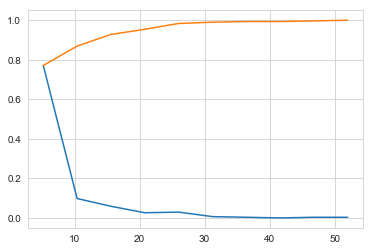

In [40]:
# CDF

counts, bin_edges = np.histogram(harman_df['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
print(cdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.show();
